<div>
    <h1><center>Water Quality Analysis</center></h1>
</div>

<div>
    <h1><left>Introduction</left></h1>
</div>

In [64]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

# Generating Random Floating Point Values
from numpy.random import seed
import random
from random import randrange

# System Operations
import sys
import os

pd.options.mode.chained_assignment = None

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, \
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, train_test_split


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

<div>
    <h3><left>Feature Description</left></h3>
</div>

In [65]:
df=pd.read_csv('water_potability.csv')
df.head(20)

ph    Hardness        Solids  Chloramines     Sulfate  \
0         NaN  204.890455  20791.318981     7.300212  368.516441   
1    3.716080  129.422921  18630.057858     6.635246         NaN   
2    8.099124  224.236259  19909.541732     9.275884         NaN   
3    8.316766  214.373394  22018.417441     8.059332  356.886136   
4    9.092223  181.101509  17978.986339     6.546600  310.135738   
5    5.584087  188.313324  28748.687739     7.544869  326.678363   
6   10.223862  248.071735  28749.716544     7.513408  393.663396   
7    8.635849  203.361523  13672.091764     4.563009  303.309771   
8         NaN  118.988579  14285.583854     7.804174  268.646941   
9   11.180284  227.231469  25484.508491     9.077200  404.041635   
10   7.360640  165.520797  32452.614409     7.550701  326.624353   
11   7.974522  218.693300  18767.656682     8.110385         NaN   
12   7.119824  156.704993  18730.813653     3.606036  282.344050   
13        NaN  150.174923  27331.361962     6.838223  299.415781   
14   7.496232  205.344982  28388.004887     5.072558         NaN   
15   6.347272  186.732881  41065.234765     9.629596  364.487687   
16   7.051786  211.049406  30980.600787    10.094796         NaN   
17   9.181560  273.813807  24041.326280     6.904990  398.350517   
18   8.975464  279.357167  19460.398131     6.204321         NaN   
19   7.371050  214.496610  25630.320037     4.432669  335.754439   

    Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0     564.308654       10.379783        86.990970   2.963135           0  
1     592.885359       15.180013        56.329076   4.500656           0  
2     418.606213       16.868637        66.420093   3.055934           0  
3     363.266516       18.436524       100.341674   4.628771           0  
4     398.410813       11.558279        31.997993   4.075075           0  
5     280.467916        8.399735        54.917862   2.559708           0  
6     283.651634       13.789695        84.603556   2.672989           0  
7     474.607645       12.363817        62.798309   4.401425           0  
8     389.375566       12.706049        53.928846   3.595017           0  
9     563.885481       17.927806        71.976601   4.370562           0  
10    425.383419       15.586810        78.740016   3.662292           0  
11    364.098230       14.525746        76.485911   4.011718           0  
12    347.715027       15.929536        79.500778   3.445756           0  
13    379.761835       19.370807        76.509996   4.413974           0  
14    444.645352       13.228311        70.300213   4.777382           0  
15    516.743282       11.539781        75.071617   4.376348           0  
16    315.141267       20.397022        56.651604   4.268429           0  
17    477.974642       13.387341        71.457362   4.503661           0  
18    431.443990       12.888759        63.821237   2.436086           0  
19    469.914551       12.509164        62.797277   2.560299           0

1. **ph**: pH of 1. water (0 to 14).

2. **Hardness**: Capacity of water to precipitate soap in mg/L.

3. **Solids**: Total dissolved solids in ppm.

4. **Chloramines**: Amount of Chloramines in ppm.

5. **Sulfate**: Amount of Sulfates dissolved in mg/L.

6. **Conductivity**: Electrical conductivity of water in μS/cm.

7. **Organic_carbon**: Amount of organic carbon in ppm.

8. **Trihalomethanes**: Amount of Trihalomethanes in μg/L.

9. **Turbidity**: Measure of light emiting property of water in NTU.

10. **Potability**: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

<div>
    <h1><center>---------------------------------------------------------------------------------------------------------------</center></h1>
</div>

In [66]:
def check_df(dataframe, head=5):
    
    print("##################### Shape #####################")
    print(dataframe.shape)
    
    print("##################### Types #####################")
    print(dataframe.dtypes)
    
    print("##################### Head #####################")
    print(dataframe.head(head))
    
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

<div>
    <h1><center>---------------------------------------------------------------------------------------------------------------</center></h1>
</div>

In [67]:
check_df(df, head=5)

##################### Shape #####################
(3276, 10)
##################### Types #####################
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object
##################### Head #####################
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.3797

In [68]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [69]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

<AxesSubplot:>

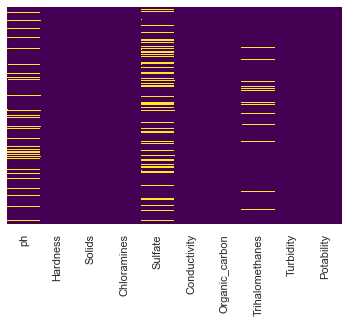

In [70]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [71]:
fig = px.histogram(df, x="ph", color="Potability")
fig.update_layout(title_text='The pH values of water according to the potability category.', # title of plot
    xaxis_title_text='pH Range', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1) # gap between bars of the same location coordinates
fig.show()

In [72]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [73]:
index_vals = df['Potability'].astype('category').cat.codes
textd = ['Non-potability' if cl==0 else 'Potability' for cl in df['Potability']]

fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='ph', values=df['ph']),
                              dict(label='Hardness', values=df['Hardness']),
                              dict(label='Solids', values=df['Solids']),
                              dict(label='Chloramines', values=df['Chloramines']),
                              dict(label='Sulfate', values=df['Sulfate']),
                              dict(label='Conductivity', values=df['Conductivity']),
                              dict(label='Organic_carbon', values=df['Organic_carbon']),
                              dict(label='Trihalomethanes', values=df['Trihalomethanes']),
                              dict(label='Turbidity', values=df['Turbidity']),
                              dict(label='Potability', values=df['Potability'])],
                text=textd,
                marker=dict(color=df['Potability'],
                            size=10,colorscale='Bluered',line=dict(width=0.5,color='rgb(230,230,230)'))))


fig.update_layout(
    title='Scatter Matrix for Water Quality Dataset',
    dragmode='select',
    width=1500,
    height=1500,
    hovermode='closest'
)


fig.show()

In [74]:
df.loc[(df['Hardness'] >= 10) & (df['Hardness'] < 50), 'New_Hardness'] = 'Soft water'
df.loc[(df['Hardness'] >= 50) & (df['Hardness'] < 100), 'New_Hardness'] = 'Slightly hard water'
df.loc[(df['Hardness'] >= 100) & (df['Hardness'] < 200), 'New_Hardness'] = 'Hard water'
df.loc[(df['Hardness'] >= 200), 'New_Hardness'] = 'Very hard water'

In [75]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability     New_Hardness  
0       10.379783        86.990970   2.963135           0  Very hard water  
1       15.180013        56.329076   4.500656           0       Hard water  
2       16.868637        66.420093   3.055934           0  Very hard water  
3       18.436524       100.341674   4.628771           0  Very hard water  
4       11.558279        31.997993   4.075075           0       Hard water

In [76]:
"""df["ph"] = df["ph"].fillna(df.groupby("New_Hardness")["ph"].transform("mean"))
df["Sulfate"] = df["Sulfate"].fillna(df.groupby("New_Hardness")["Sulfate"].transform("mean"))
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df.groupby("New_Hardness")["Trihalomethanes"].transform("mean"))"""

'df["ph"] = df["ph"].fillna(df.groupby("New_Hardness")["ph"].transform("mean"))\ndf["Sulfate"] = df["Sulfate"].fillna(df.groupby("New_Hardness")["Sulfate"].transform("mean"))\ndf["Trihalomethanes"] = df["Trihalomethanes"].fillna(df.groupby("New_Hardness")["Trihalomethanes"].transform("mean"))'

In [77]:
fig = px.histogram(df, x="ph", color="Potability")
fig.update_layout(title_text='The pH values of water according to the potability category.', # title of plot
    xaxis_title_text='pH Range', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1) # gap between bars of the same location coordinates
fig.show()

In [78]:
df = df.fillna(method='ffill').fillna(method='bfill')

In [79]:
"""df["ph"] = df["ph"].fillna(df.groupby("New_Hardness")["ph"].transform("median"))
df["Sulfate"] = df["Sulfate"].fillna(df.groupby("New_Hardness")["Sulfate"].transform("median"))
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df.groupby("New_Hardness")["Trihalomethanes"].transform("median"))"""

'df["ph"] = df["ph"].fillna(df.groupby("New_Hardness")["ph"].transform("median"))\ndf["Sulfate"] = df["Sulfate"].fillna(df.groupby("New_Hardness")["Sulfate"].transform("median"))\ndf["Trihalomethanes"] = df["Trihalomethanes"].fillna(df.groupby("New_Hardness")["Trihalomethanes"].transform("median"))'

In [80]:
"""df["ph"] = df["ph"].fillna(value=df["ph"].median())
df["Sulfate"] = df["Sulfate"].fillna(value=df["Sulfate"].median())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(value=df["Trihalomethanes"].median())"""

'df["ph"] = df["ph"].fillna(value=df["ph"].median())\ndf["Sulfate"] = df["Sulfate"].fillna(value=df["Sulfate"].median())\ndf["Trihalomethanes"] = df["Trihalomethanes"].fillna(value=df["Trihalomethanes"].median())'

In [81]:
df.loc[(df['ph'] < 7), 'New_ph'] = 'Acid'
df.loc[(df['ph'] == 7), 'New_ph'] = 'Neutral'
df.loc[(df['ph'] > 7), 'New_ph'] = 'Alkaline'

<AxesSubplot:>

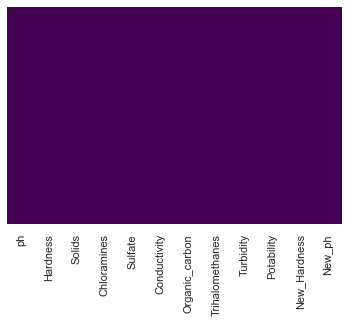

In [82]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [83]:
df.head(30)

ph    Hardness        Solids  Chloramines     Sulfate  \
0    3.716080  204.890455  20791.318981     7.300212  368.516441   
1    3.716080  129.422921  18630.057858     6.635246  368.516441   
2    8.099124  224.236259  19909.541732     9.275884  368.516441   
3    8.316766  214.373394  22018.417441     8.059332  356.886136   
4    9.092223  181.101509  17978.986339     6.546600  310.135738   
5    5.584087  188.313324  28748.687739     7.544869  326.678363   
6   10.223862  248.071735  28749.716544     7.513408  393.663396   
7    8.635849  203.361523  13672.091764     4.563009  303.309771   
8    8.635849  118.988579  14285.583854     7.804174  268.646941   
9   11.180284  227.231469  25484.508491     9.077200  404.041635   
10   7.360640  165.520797  32452.614409     7.550701  326.624353   
11   7.974522  218.693300  18767.656682     8.110385  326.624353   
12   7.119824  156.704993  18730.813653     3.606036  282.344050   
13   7.119824  150.174923  27331.361962     6.838223  299.415781   
14   7.496232  205.344982  28388.004887     5.072558  299.415781   
15   6.347272  186.732881  41065.234765     9.629596  364.487687   
16   7.051786  211.049406  30980.600787    10.094796  364.487687   
17   9.181560  273.813807  24041.326280     6.904990  398.350517   
18   8.975464  279.357167  19460.398131     6.204321  398.350517   
19   7.371050  214.496610  25630.320037     4.432669  335.754439   
20   7.371050  227.435048  22305.567414    10.333918  335.754439   
21   6.660212  168.283747  30944.363591     5.858769  310.930858   
22   6.660212  215.977859  17107.224226     5.607060  326.943978   
23   3.902476  196.903247  21167.500099     6.996312  326.943978   
24   5.400302  140.739062  17266.593422    10.056852  328.358241   
25   6.514415  198.767351  21218.702871     8.670937  323.596349   
26   3.445062  207.926260  33424.768678     8.782147  384.007006   
27   3.445062  145.768181  13224.935639     7.906445  304.001993   
28   3.445062  266.421018  26362.965012     7.700063  395.389490   
29   3.445062  148.153061  15193.413474     9.046833  307.011793   

    Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0     564.308654       10.379783        86.990970   2.963135           0   
1     592.885359       15.180013        56.329076   4.500656           0   
2     418.606213       16.868637        66.420093   3.055934           0   
3     363.266516       18.436524       100.341674   4.628771           0   
4     398.410813       11.558279        31.997993   4.075075           0   
5     280.467916        8.399735        54.917862   2.559708           0   
6     283.651634       13.789695        84.603556   2.672989           0   
7     474.607645       12.363817        62.798309   4.401425           0   
8     389.375566       12.706049        53.928846   3.595017           0   
9     563.885481       17.927806        71.976601   4.370562           0   
10    425.383419       15.586810        78.740016   3.662292           0   
11    364.098230       14.525746        76.485911   4.011718           0   
12    347.715027       15.929536        79.500778   3.445756           0   
13    379.761835       19.370807        76.509996   4.413974           0   
14    444.645352       13.228311        70.300213   4.777382           0   
15    516.743282       11.539781        75.071617   4.376348           0   
16    315.141267       20.397022        56.651604   4.268429           0   
17    477.974642       13.387341        71.457362   4.503661           0   
18    431.443990       12.888759        63.821237   2.436086           0   
19    469.914551       12.509164        62.797277   2.560299           0   
20    554.820086       16.331693        45.382815   4.133423           0   
21    523.671298       17.884235        77.042318   3.749701           0   
22    436.256194       14.189062        59.855476   5.459251           0   
23    444.478883       16.609033        90.181676   4.528523           0   
24

In [84]:
fig = px.histogram(df, x="ph", color="Potability")
fig.update_layout(title_text='The pH values of water according to the potability category.', # title of plot
    xaxis_title_text='pH Range', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1) # gap between bars of the same location coordinates
fig.show()

In [85]:
# distribution checks.

for col in df.columns:
    fig = px.histogram(df, x=col, color="Potability")
    fig.update_layout(title_text='The ' +col+ ' values of water according to the potability category.', # title of plot
                      xaxis_title_text=col, # xaxis label
                      yaxis_title_text='Count', # yaxis label
                      bargap=0.2, # gap between bars of adjacent location coordinates
                      bargroupgap=0.1) # gap between bars of the same location coordinates
    fig.show()
#     sns.histplot(x = col, bins = 50, hue='Potability', data = df)
#     plt.show()

In [86]:
def outlier_winsorize(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    df.loc[(df[col] < lower), col] = lower
    df.loc[(df[col] > upper), col] = upper

In [87]:
def overview_dataset(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [88]:
cat_cols, num_cols, cat_but_car = overview_dataset(df)
num_cols = [col for col in num_cols if "Potability" not in col]

Observations: 3276
Variables: 12
cat_cols: 3
num_cols: 9
cat_but_car: 0
num_but_cat: 1


In [89]:
num_cols

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [90]:
# outlier detection, i will leave it as it is.

for col in num_cols:
    fig = px.box(df, y=col)
    fig.show()
#     sns.boxplot(x = col, data = df)
#     plt.show()

In [91]:
for col in num_cols:
    outlier_winsorize(df,col)

In [92]:
df = pd.get_dummies(df, columns=['New_Hardness', 'New_ph'])
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     3.716080  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  368.516441   
2     8.099124  224.236259  19909.541732     9.275884  368.516441   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  44831.869873     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  359.948574   
3273  9.419510  175.762646  33155.578218     7.350233  359.948574   
3274  5.126763  230.603758  11983.869376     6.303357  359.948574   
3275  7.874671  195.102299  17404.177061     7.509306  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225        66.687695   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

      New_Hardness_Hard water  New_Hardness_Slightly hard water  \
0                           0                                 0   
1                           1                                 0   
2                           0                                 0   
3                           0                                 0   
4                           1                                 0   
...                       ...                               ...   
3271                        1                                 0   
3272                        1                                 0   
3273                        1                                 0   
3274                        0                                 0   
3275                        1                                 0   

      New_Hardness_Soft water  New_Hardness_Very hard water  New_ph_Acid  \
0                           0                             1            1   
1                           0                             0            1   
2                           0                             1            0   
3                           0                             1            0   
4                           0                             0            0   
...                       ...                           ...          ...   
3271                        0                             0            1   
3272                        0                             0            0   
3273                        0                             0            0   
3274                        0                             1            1   
3275                        0                             0            0   

      New_ph_Alkaline  
0                   0  
1                   0  
2                   1  
3                   1  
4                   1  
...               ...  
3271                0  
3272                1  
3273                1  
3274                0  
3275                1  

[3276 rows x 16 columns]

In [93]:
check_df(df)

##################### Shape #####################
(3276, 16)
##################### Types #####################
ph                                  float64
Hardness                            float64
Solids                              float64
Chloramines                         float64
Sulfate                             float64
Conductivity                        float64
Organic_carbon                      float64
Trihalomethanes                     float64
Turbidity                           float64
Potability                            int64
New_Hardness_Hard water               uint8
New_Hardness_Slightly hard water      uint8
New_Hardness_Soft water               uint8
New_Hardness_Very hard water          uint8
New_ph_Acid                           uint8
New_ph_Alkaline                       uint8
dtype: object
##################### Head #####################
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  3.716080  204.890455  20791.318981     

In [94]:
X = df.drop(["Potability"], axis=1)
y = df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [95]:
print(X_train.shape)  
print(X_test.shape) 

(2293, 15)
(983, 15)


In [96]:
# dropout method.

rf_model = RandomForestClassifier(random_state=1).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

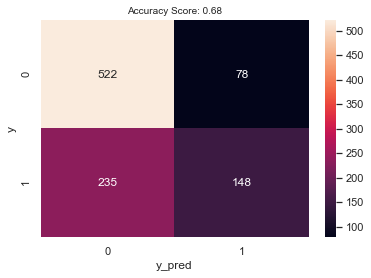

In [97]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()
    
plot_confusion_matrix(y_test, y_pred)

In [98]:
# ACCURACY
accuracy_score(y_test, y_pred)

0.681586978636826

In [99]:
# PRECISION
precision_score(y_test, y_pred)

0.6548672566371682

In [100]:
# RECALL
recall_score(y_test, y_pred)

0.38642297650130547

In [101]:
# F1
f1_score(y_test, y_pred)

0.4860426929392446

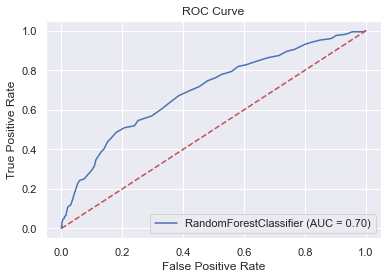

In [102]:
# ROC CURVE
plot_roc_curve(rf_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [103]:
# AUC
y_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_prob)

0.6970648389904265

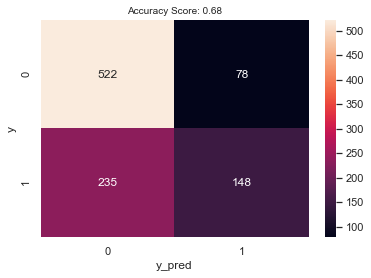

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       600
           1       0.65      0.39      0.49       383

    accuracy                           0.68       983
   macro avg       0.67      0.63      0.63       983
weighted avg       0.68      0.68      0.66       983



In [104]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

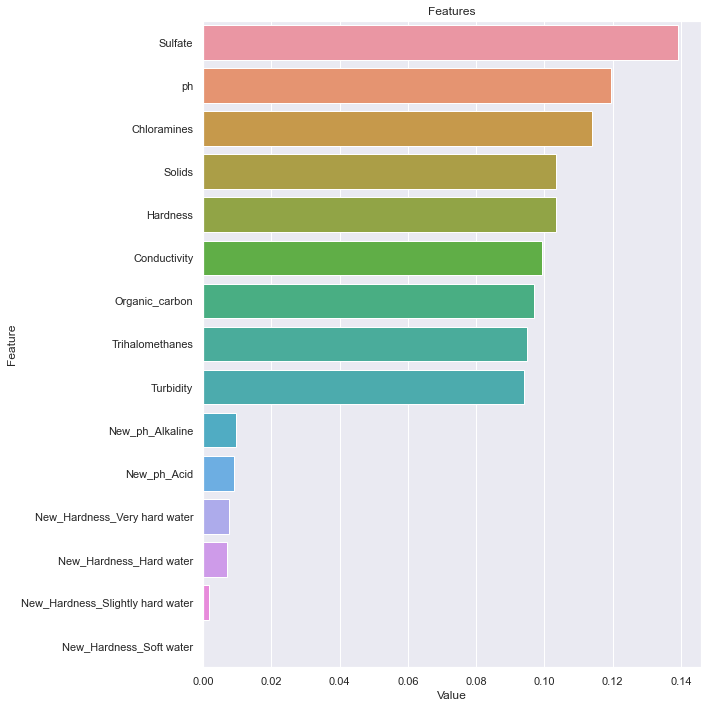

In [105]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X_train)

In [106]:
def run_single_model():
    models = [
              ('RF', RandomForestClassifier()),
              ('GBM', GradientBoostingClassifier()),
              ("XGBoost", XGBClassifier(objective="binary:logistic")),
              ("LightGBM", LGBMClassifier()),
              ("CatBoost", CatBoostClassifier(verbose=False)),
              ("AdaBoost", AdaBoostClassifier()),
              ("Bagging", BaggingClassifier()),
              ("ExtraTrees", ExtraTreesClassifier()),
              ("HistGradient", HistGradientBoostingClassifier())
            ]

    global output_df
    output_df = pd.DataFrame(models, columns=["MODEL_NAME", "MODEL_BASE"])
    output_df.drop('MODEL_BASE', axis=1, inplace=True)
    for name, classifier in models:
        recall_cv = np.mean(cross_val_score(classifier, X, y, cv=3, scoring="recall"))
        print(f"recall_cv: {round(recall_cv, 4)} ({name}) ")
        output_df.loc[output_df['MODEL_NAME'] == name, "RECALL_BASE_CV_ALL"] = recall_cv

    ## HYPER PARAMETERS TUNNING
    rf_params = {"max_depth": [5, 15, 20, None],
                 "max_features": [5, 7, 9,  "auto"],
                 "min_samples_split": [6, 8, 15],
                 "n_estimators": [150, 200, 300]}

    xgboost_params = {"learning_rate": [ 0.01, 0.05, 0.1, 0.15],
                      "max_depth": [3, 5, 8],
                      "n_estimators": [100, 200, 300],
                      "colsample_bytree": [0.3, 0.5, 0.8]}

    lightgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
                       "n_estimators": [100, 300, 500],
                       "colsample_bytree": [0.1, 0.3, 0.7, 1]}

    extraTrees_params = {
                        'n_estimators': [10, 50, 100],
                        'max_depth': [2, 16, 50],
                        'min_samples_split': [2, 6],
                        'min_samples_leaf': [1, 2],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'bootstrap': [True, False],
                        'warm_start': [True, False],
                        }

    HistGradient_params = {"learning_rate": [0.01, 0.05],
                       "max_iter": [20, 100],
                       "max_depth": [None, 25],
                       "l2_regularization": [0.0, 1.5],
                           }

    classifiers = [
                  ("RF", RandomForestClassifier(), rf_params),
                  ('XGBoost', XGBClassifier(objective='reg:squarederror'), xgboost_params),
                  ('LightGBM', LGBMClassifier(), lightgbm_params),
                  ('ExtraTrees', ExtraTreesClassifier(), extraTrees_params),
                  ('HistGradient', HistGradientBoostingClassifier(), HistGradient_params)
                  ]
    global best_models
    best_models = {}

    for name, classifier, params in classifiers:
        #GridSearch
        gs_best = GridSearchCV(classifier, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)
        recall_cv = np.mean(cross_val_score(final_model, X, y, cv=3, scoring="recall"))
        print(f"recall_cv (After): {round(recall_cv, 4)} ({name}) ")
        output_df.loc[output_df['MODEL_NAME'] == name, "ReCALL_TUNED_CV_ALL"] = recall_cv
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        output_df.loc[output_df['MODEL_NAME'] == name, "BEST_PARAMS"] = str(gs_best.best_params_)

        best_models[name] = final_model



In [107]:
def run_multiple_model():
    ######################################################
    # # Stacking & Ensemble Learning
    ######################################################
    best_models

    model_name = 'voting_reg_RF_LGBM'
    model = VotingClassifier(estimators=[('RF', best_models["RF"]), ('LightGBM', best_models["LightGBM"])])
    model.fit(X, y)
    recall_cv = np.mean(cross_val_score(model, X, y, cv=5, scoring="recall"))
    print(f"recall_cv ({model_name}): {round(recall_cv, 4)} ")
    global output_df
    output_df = output_df.append({'MODEL_NAME': {model_name}}, ignore_index=True)
    output_df.loc[output_df['MODEL_NAME'] == {model_name}, "ReCALL_TUNED_CV_ALL"] = recall_cv
    best_models[model_name] = model



    estimators = [('RF', best_models["RF"]), ('XGBoost', best_models["XGBoost"])]
    stacking_reg = StackingClassifier(estimators=estimators, final_estimator=best_models["LightGBM"])
    stacking_reg.fit(X, y)
    stacking_reg_recall = np.mean(cross_val_score(stacking_reg, X, y, cv=5, scoring="recall"))
    print(f"RECALL (stacking_reg_RF_XG): {round(stacking_reg_recall, 4)} ")
    output_df = output_df.append({'MODEL_NAME': "stacking_reg_rmse"}, ignore_index=True)
    output_df.loc[output_df['MODEL_NAME'] == "stacking_reg_rmse", "ReCALL_TUNED_CV_ALL"] = stacking_reg_recall
    best_models['stacking_reg_RF_XG'] = stacking_reg

    voting_reg_RF_XG_LGBM = VotingClassifier(estimators=[('RF', best_models["RF"]), ('XGBoost', best_models["XGBoost"]), ('LightGBM', best_models["LightGBM"])])
    voting_reg_RF_XG_LGBM.fit(X, y)
    voting_reg_recall = np.mean(cross_val_score(voting_reg_RF_XG_LGBM, X, y, cv=5, scoring="recall"))
    print(f"RECALL (voting_reg_RF_XG_LGBM): {round(voting_reg_recall, 4)} ")
    output_df = output_df.append({'MODEL_NAME': "voting_reg_RF_XG_LGBM"}, ignore_index=True)
    output_df.loc[output_df['MODEL_NAME'] == "voting_reg_RF_XG_LGBM", "ReCALL_TUNED_CV_ALL"] = voting_reg_recall
    best_models['voting_reg_RF_XG_LGBM'] = voting_reg_RF_XG_LGBM

In [108]:
run_single_model()

recall_cv: 0.2966 (RF) 
recall_cv: 0.2762 (GBM) 
[01:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ms\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[01:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
recall_cv: 0.3646 (XGBoost) 
recall_cv: 0.349 (LightGBM) 
recall_cv: 0.3341 (CatBoost) 
recall_cv: 0.2465 (AdaBoost) 
recall_cv: 0.3333 (Bagging) 
recall_cv: 0.2864 (ExtraTrees) 
recall_cv: 0.3529 (HistGradient) 
recall_cv (After): 0.2942 (RF) 
RF best params: {'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 300}



C:\Users\ms\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\ms\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



recall_cv (After): 0.2332 (XGBoost) 
XGBoost best params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}

recall_cv (After): 0.1182 (LightGBM) 
LightGBM best params: {'colsample_bytree': 1, 'learning_rate': 0.001, 'n_estimators': 500}

recall_cv (After): 0.2199 (ExtraTrees) 
ExtraTrees best params: {'bootstrap': False, 'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'warm_start': True}

recall_cv (After): 0.2308 (HistGradient) 
HistGradient best params: {'l2_regularization': 0.0, 'learning_rate': 0.01, 'max_depth': None, 'max_iter': 100}



In [109]:
run_multiple_model()

recall_cv (voting_reg_RF_LGBM): 0.1322 


C:\Users\ms\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\ms\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\ms\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following:

RECALL (stacking_reg_RF_XG): 0.0313 


C:\Users\ms\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\ms\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\ms\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following:

RECALL (voting_reg_RF_XG_LGBM): 0.2175 


In [110]:
output_df.sort_values(["ReCALL_TUNED_CV_ALL", "RECALL_BASE_CV_ALL"])

MODEL_NAME  RECALL_BASE_CV_ALL  ReCALL_TUNED_CV_ALL  \
10      stacking_reg_rmse                 NaN             0.031275   
3                LightGBM            0.348983             0.118153   
9    {voting_reg_RF_LGBM}                 NaN             0.132215   
11  voting_reg_RF_XG_LGBM                 NaN             0.217482   
7              ExtraTrees            0.286385             0.219875   
8            HistGradient            0.352895             0.230829   
2                 XGBoost            0.364632             0.233177   
0                      RF            0.296557             0.294210   
5                AdaBoost            0.246479                  NaN   
1                     GBM            0.276213                  NaN   
6                 Bagging            0.333333                  NaN   
4                CatBoost            0.334116                  NaN   

                                          BEST_PARAMS  
10                                                NaN  
3   {'colsample_bytree': 1, 'learning_rate': 0.001...  
9                                                 NaN  
11                                                NaN  
7   {'bootstrap': False, 'max_depth': 16, 'max_fea...  
8   {'l2_regularization': 0.0, 'learning_rate': 0....  
2   {'colsample_bytree': 0.8, 'learning_rate': 0.0...  
0   {'max_depth': 20, 'max_features': 'auto', 'min...  
5                                                 NaN  
1                                                 NaN  
6                                                 NaN  
4                                                 NaN

In [112]:
# final_model = best_model["A"].fit(X, y)

In [ ]:
# pickle.dump(final_model, open("xgb_tuned_model.pkl", 'wb'))

<div>
    <h1><left>-----------------------------------------------------------------------------------------------------------------</left></h1>
</div>

<div>
    <h1><left>Thanks!</left></h1>
</div>